In [ ]:
!pip install bertopic datasets openai datamapplot

  Using cached bertopic-0.16.4-py3-none-any.whl.metadata (23 kB)
  Using cached datasets-3.3.2-py3-none-any.whl.metadata (19 kB)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**ArXiv Articles: Computation and Language**

In [ ]:
from datasets import load_dataset
dataset = load_dataset("MaartenGr/arxiv_nlp")["train"]

# Extract metadata
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/53.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44949 [00:00<?, ? examples/s]

**A Commong Pipeline for Text CLustering**

**1. Embedding Documents**

In [ ]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("thenlper/gte-small")
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [ ]:
embeddings.shape

(44949, 384)

**2.Reduce Dimensionality of the Embeddings**

In [ ]:
from umap import UMAP

umap_model = UMAP(
    n_components=5, min_dist=0.0, metric='cosine', random_state=42)

reduced_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
embeddings.shape

(44949, 384)

3. Cluster the Reduced Embeddings

In [ ]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(
    min_cluster_size=50, metric='euclidean', cluster_selection_method='eom'
).fit(reduced_embeddings)

clusters = hdbscan_model.labels_

len(set(clusters))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


150

**Inspecting the Clusters**

Manually inspect the frest 3 abtracts in cluster 0

In [ ]:
import numpy as np

cluster = 0
for index in np.where(clusters == cluster)[0][:3]:
    print(abstracts[index][:300] + "...\n")

  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written fo...

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign lang...

  Modern computational linguistic software cannot produce important aspects of
sign language translation. Using some researches we deduce that the majority of
automatic sign language translation systems ignore many aspects when they
generate animation; therefore the interpretation lost the truth inf...



**Visualize the Clusters**

In [ ]:
import pandas as pd

#further reduction into 2D
from umap import UMAP

umap_model = UMAP(
    n_components=2, min_dist=0.0, metric='cosine', random_state=42)

reduced_embeddings = umap_model.fit_transform(embeddings)
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["text"] = titles
df["cluster"] = [str(c) for c in clusters]

#select outliers and non outliers

clusters_df = df.loc[df.cluster != "-1", :]
outliers_df = df.loc[df.cluster == "-1", :]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


**Static Plot**

(-7.463608884811402,
 11.407711172103882,
 -1.1912264376878738,
 16.967825546860695)

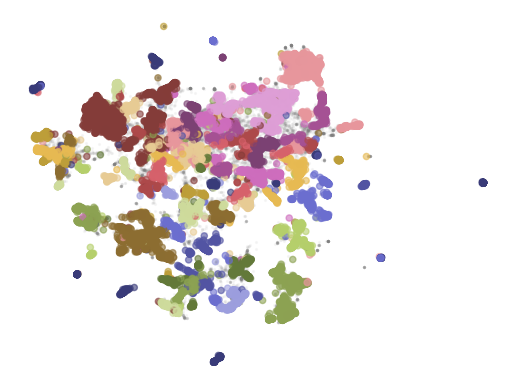

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(outliers_df.x, outliers_df.y, s=2, alpha=0.05, c="grey")
plt.scatter(clusters_df.x, clusters_df.y, c=clusters_df.cluster.astype(int),
            alpha=0.6, s=20, cmap="tab20b")
plt.axis("off")

**From Text Clustering to Topic Modelling**

In [ ]:
!pip install bertopic datasets openai datamapplot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.3 MB/s eta 0:00:00
   ━━

In [ ]:
from datasets import load_dataset
dataset = load_dataset("MaartenGr/arxiv_nlp")["train"]

# Extract metadata
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/53.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44949 [00:00<?, ? examples/s]

In [ ]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("thenlper/gte-small")
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [ ]:
from umap import UMAP

#reduce from 384 to 5 dimension
umap_model = UMAP(
    n_components=5, min_dist=0.0, metric='cosine', random_state=42)

reduced_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(
    min_cluster_size=50, metric='euclidean', cluster_selection_method='eom'
).fit(reduced_embeddings)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
).fit(abstracts, embeddings)

2025-03-07 09:46:10,431 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-07 09:47:38,857 - BERTopic - Dimensionality - Completed ✓
2025-03-07 09:47:38,860 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-07 09:47:42,938 - BERTopic - Cluster - Completed ✓
2025-03-07 09:47:42,967 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-07 09:47:51,050 - BERTopic - Representation - Completed ✓


In [ ]:
topic_model.get_topic_info()

Topic  Count                                      Name  \
0       -1  14551                          -1_the_of_and_to   
1        0   2224            0_question_qa_questions_answer   
2        1   2050              1_speech_asr_recognition_end   
3        2   1520     2_medical_clinical_biomedical_patient   
4        3    964            3_translation_nmt_machine_bleu   
..     ...    ...                                       ...   
145    144     53       144_gans_gan_adversarial_generation   
146    145     52      145_backdoor_attacks_attack_triggers   
147    146     51      146_counseling_mental_therapy_health   
148    147     51  147_multimodal_modality_fusion_sentiment   
149    148     51    148_coherence_discourse_paragraph_text   

                                        Representation  \
0    [the, of, and, to, in, we, language, for, that...   
1    [question, qa, questions, answer, answering, a...   
2    [speech, asr, recognition, end, acoustic, spea...   
3    [medical, clinical, biomedical, patient, healt...   
4    [translation, nmt, machine, bleu, neural, engl...   
..                                                 ...   
145  [gans, gan, adversarial, generation, generativ...   
146  [backdoor, attacks, attack, triggers, poisoned...   
147  [counseling, mental, therapy, health, psychoth...   
148  [multimodal, modality, fusion, sentiment, moda...   
149  [coherence, discourse, paragraph, text, cohesi...   

                                   Representative_Docs  
0    [  Knowledge-enhanced pre-trained models for l...  
1    [  In open question answering (QA), the answer...  
2    [  Voice Assistants such as Alexa, Siri, and G...  
3    [  Biomedical Named Entity Recognition (NER) i...  
4    [  Neural Machine Translation (NMT) models ach...  
..                                                 ...  
145  [  Text generation is of particular interest i...  
146  [  The prompt-based learning paradigm, which b...  
147  [  Mental health care poses an increasingly se...  
148  [  Multimodal machine learning is a core resea...  
149  [  While there has been significant progress t...  

[150 rows x 5 columns]

In [ ]:
topic_model.get_topic(11)

[('image', 0.03405212783603451),
 ('visual', 0.02469688961457895),
 ('vision', 0.017452755178315595),
 ('multimodal', 0.015693725767634257),
 ('captioning', 0.015434693152222316),
 ('captions', 0.0142024492412433),
 ('images', 0.014154038162453258),
 ('modal', 0.01374044042790457),
 ('caption', 0.012018158613556193),
 ('language', 0.00868122228613332)]

In [ ]:
topic_model.find_topics("topic modelling")

([22, -1, 45, 2, 30], [0.947376, 0.90622115, 0.9048922, 0.9042983, 0.8994713])

In [ ]:
topic_model.get_topic(22)

[('topic', 0.06945617465332493),
 ('topics', 0.036023179433915774),
 ('lda', 0.01661929568243725),
 ('latent', 0.013983559515945656),
 ('document', 0.012634641415039357),
 ('documents', 0.012620262980522618),
 ('modeling', 0.012530857445661283),
 ('dirichlet', 0.010302387745128845),
 ('word', 0.008892079799744539),
 ('allocation', 0.008109142901468164)]

In [ ]:
topic_model.topics_[titles.index('Attention Is All You Need')]

3

**Visualizations**

In [ ]:
fig = topic_model.visualize_documents(
    titles,
    reduced_embeddings=reduced_embeddings,
    width=1200,
    hide_annotations=True
)


fig.update_layout(font=dict(size=16))

In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_hierarchy()

**Representation Model**

In [ ]:
from copy import deepcopy
original_topics = deepcopy(topic_model.topic_representations_)

In [ ]:
def topic_differences(model, original_topics, nr_topics=10):
    import pandas as pd
    df = pd.DataFrame(columns=["Topic", "Original Top Words", "New Top Words"])

    for topic in range(nr_topics):
        og_words = " | ".join(list(zip(*original_topics[topic]))[0][:5])
        new_words = " | ".join(list(zip(*model.get_topic(topic)))[0][:5])  # FIXED LINE
        df.loc[len(df)] = [topic, og_words, new_words]

    return df


KeyBERTInspired

In [ ]:
import pandas as pd
from bertopic.representation import KeyBERTInspired

representation_model = KeyBERTInspired()
topic_model.update_topics(abstracts, representation_model=representation_model)

topic_differences(topic_model, original_topics)

Topic                                 Original Top Words  \
0      0     question | qa | questions | answer | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2  medical | clinical | biomedical | patient | he...   
3      3        translation | nmt | machine | bleu | neural   
4      4  summarization | summaries | summary | abstract...   
5      5      hate | offensive | speech | detection | toxic   
6      6      gender | bias | biases | debiasing | fairness   
7      7    relation | extraction | re | relations | entity   
8      8      ner | entity | named | recognition | entities   
9      9  word | embeddings | embedding | similarity | v...   

                                       New Top Words  
0  answering | questions | comprehension | answer...  
1  transcription | speech | phonetic | encoder | ...  
2            nlp | ehr | clinical | annotated | text  
3  translation | translate | translations | trans...  
4  summarization | summarizers | summaries | summ...  
5  hate | hateful | language | offensive | cyberb...  
6         gendered | gender | bias | biases | biased  
7  relation | relations | relational | sentences ...  
8         entity | entities | labeled | name | named  
9  embedding | embeddings | word2vec | representa...

Maximal Marginal Relevance

In [ ]:
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.5)
topic_model.update_topics(abstracts, representation_model=representation_model)

topic_differences(topic_model, original_topics)

Topic                                 Original Top Words  \
0      0     question | qa | questions | answer | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2  medical | clinical | biomedical | patient | he...   
3      3        translation | nmt | machine | bleu | neural   
4      4  summarization | summaries | summary | abstract...   
5      5      hate | offensive | speech | detection | toxic   
6      6      gender | bias | biases | debiasing | fairness   
7      7    relation | extraction | re | relations | entity   
8      8      ner | entity | named | recognition | entities   
9      9  word | embeddings | embedding | similarity | v...   

                                       New Top Words  
0   questions | comprehension | to | knowledge | hop  
1           speech | asr | error | model | automatic  
2  clinical | biomedical | patient | notes | heal...  
3       translation | nmt | bleu | neural | parallel  
4  summarization | document | extractive | rouge ...  
5        hate | toxic | social | platforms | dataset  
6  gender | bias | fairness | stereotypes | embed...  
7  extraction | relations | entity | distant | se...  
8         ner | recognition | entities | nested | in  
9  embeddings | similarity | vector | semantic | ...

FLAN-T5

In [ ]:
from transformers import pipeline
from bertopic.representation import TextGeneration

# Define prompt correctly
prompt = """ I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the documents and keywords, what is the topic about?"""

generator = pipeline("text2text-generation", model="google/flan-t5-small")
representation_model = TextGeneration(
    generator, prompt=prompt, doc_length=50, tokenizer="whitespace"
    )
topic_model.update_topics(abstracts, representation_model=representation_model)

# Compare topic differences
topic_differences(topic_model, original_topics)


Device set to use cuda:0
100%|██████████| 150/150 [00:17<00:00,  8.77it/s]


Topic                                 Original Top Words  \
0      0     question | qa | questions | answer | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2  medical | clinical | biomedical | patient | he...   
3      3        translation | nmt | machine | bleu | neural   
4      4  summarization | summaries | summary | abstract...   
5      5      hate | offensive | speech | detection | toxic   
6      6      gender | bias | biases | debiasing | fairness   
7      7    relation | extraction | re | relations | entity   
8      8      ner | entity | named | recognition | entities   
9      9  word | embeddings | embedding | similarity | v...   

                                       New Top Words  
0           Multi-hop question answering |  |  |  |   
1             Speech-to-text translation |  |  |  |   
2    Biomedical Named Entity Recognition |  |  |  |   
3             Neural machine translation |  |  |  |   
4              Abstractive summarization |  |  |  |   
5                            Hate Speech |  |  |  |   
6  Gender bias in artificial intelligence and nat...  
7                    Relation extraction |  |  |  |   
8               Named entity recognition |  |  |  |   
9                        Word embeddings |  |  |  |

OpenAI

In [ ]:
import openai
from bertopic.representation import OpenAI

# Define prompt correctly
prompt = """I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the information above, extract a short topic label in the following format:
topic: <short topic label>
"""
client = openai.OpenAI(api_key="")

representation_model = OpenAI(
    client, model="gpt-3.5-turbo", exponential_backoff=True, chat=True, prompt=prompt
)

topic_model.update_topics(abstracts, representation_model=representation_model)

# Compare topic differences
topic_differences(topic_model, original_topics)

  0%|          | 0/150 [08:01<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Get the topics for each document
doc_topics = topic_model.topics_

# Create the figure
plt.figure(figsize=(12, 8))

# Clean titles of any LaTeX commands
def clean_text(text):
    # Remove or replace LaTeX commands
    import re
    text = re.sub(r'\\textit{([^}]*)}', r'\1', text)  # Replace \textit{text} with just text
    text = re.sub(r'\\[a-zA-Z]+{([^}]*)}', r'\1', text)  # Replace other \commands{text}
    text = text.replace('\\', '')  # Remove remaining backslashes
    return text

cleaned_titles = [clean_text(title) if isinstance(title, str) else str(title) for title in titles]

# Create scatter plot
scatter = plt.scatter(
    reduced_embeddings[:, 0],
    reduced_embeddings[:, 1],
    c=doc_topics,
    cmap='tab20',
    alpha=0.6
)

# Add labels with cleaned text
for i, title in enumerate(cleaned_titles):
    plt.annotate(
        title[:20] + '...' if len(title) > 20 else title,
        (reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
        fontsize=8,
        alpha=0.7,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # Add white background to labels
    )

# Add a simple title without LaTeX
plt.title('Document Topic Map', fontsize=12)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Topic Number')

# Save the figure
plt.savefig("datamapplot.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.close()  # Close the figure to free memory

NameError: name 'plt' is not defined

Word Cloud

In [ ]:
topic_model.update_topics(abstracts, top_n_words=500)

2025-03-07 10:21:29,974 - BERTopic - WARNING: Note that extracting more than 100 words from a sparse can slow down computation quite a bit.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    plt.figure(figsize=(10,5))
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000, width=1600, height=800)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=17)